![example](images/director_shot.jpeg)

# The Mystery of Microsoft Movie and Streaming Division

**Author:** Grant Edwards
***

## Abstract


Microsoft wants to launch a new streaming and movie division to compete within the theatric box office and home entertainment industry that has high potential to generate revenue but is a competitive industry. To support the launch, we have analyzed data from past movies to find the best genres Mystery and Horror, with high return on investments and low cost of production. May would be an ideal launch month as it historically has a lower number of releases and the highest ROI. We also found that James Wan, David F. Sandberg, and M. Night Shyamalan would all make great directors for our starting films with their experience and success in these genres.

## Business Problem

Microsoft wants to start a new streaming and movie division to compete with the likes of Netflix, Hulu, Amazon, Apple, and other major streaming services after seeing competitors’ various success in the field and it is good for large businesses to expand into a variety of industries as to have a more diverse portfolio. The theatric box office and home entertainment is a $100 billion dollar industry (variety, 2022). With a sector this large and with high potential return on investment, it would be a great opportunity for Microsoft to achieve an additional source of revenue for Microsoft, it will be another means to reach more potential customers for other sectors of the organization. 

To find where to start this new division we will be answering the following questions:


* What is the best genre of movie to start with?
* When would be the ideal release date?
* Who should be chosen as the director for the film?

To accomplish this, we will be using data from IMDB, Rotten Tomatoes, TheMovieDB and The Numbers.

Breaking into the theatric and home entertainment industry can be difficult with many big competitors already established and can have large cost of entry, with many films costing tens or even hundreds of millions of dollars to produce. The reason why we are focusing on these key points is that we can find the best genres to break into the industry without high costs of production, when to launch our program, so that we are not getting lost in a sea of compaction, and finding a director who has already found success in the genre and the industry to give us a solid backbone to get off to a good start. 


## Data Understanding

The data we will be using for this project comes from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB and The Numbers. It contains information on movies, such as: the key personal involved in producing the films, reviews, and financials.
The key factors that we will be using to find achieve our goals of best genre, time of release and ideal director will be the financials of the movies (global gross and production budget), the release month of films and how films perform in each month, and who directed the most successful films in the genre that has the most potential. This should leave s with a solid starting point to break into the cinematic industry. 

The most important data we will be looking it is the financials. Besides global gross and the production budget, we will look at profit (global gross – production budget) and the return of investment (ROI = (profit/production budget)*100). There are other factors that we will not be going into that are not factored into this (such as advertising and other expenses). 


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#!pip install pandasql
from datetime import datetime
import matplotlib.ticker as mtick

In [2]:
#Set global for SQL to work more effeciently
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [3]:
# Import datafiles and turn into DataFrames

persons = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')

details = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep ='\t')

tmdb = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')


### Data Preparation

Lets start by looking at some of the data. looking at the crew and persons DataFrames, we can get the tconst(movie code) and the associated nconst (personnal code) under directors.



In [4]:
crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [5]:
persons

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


We can combine the movie code and the directors actual name through a SQL query from the crew and persons DataFrames to make a new DataFrame called director.

In [6]:
#Start by getting the director names connected to tconst (movie code)
q = """
SELECT c.tconst, p.primary_name AS director_name
FROM crew AS c
JOIN persons AS p
    ON c.directors = p.nconst
"""
director = pysqldf(q)
director

,tconst,director_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0879859,Eric Manchester
4,tt0996958,Tara Cardinal
...,...,...
124684,tt8998302,Daryl Boman
124685,tt8999892,C. Damon Adcock
124686,tt8999974,Daysi Burbano
124687,tt9001390,Bernard Lessa


Now we have the director names associated with the movie code in director. Lets look at the budget DataFrame.

In [7]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [8]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


production_budget, domestic_gross and worldwide_gross are strings and need to be floats. 

In [9]:
#The values for production_budget, domestic_gross and worldwide_gross are strings, clean and convert to floats.
budget['production_budget'] = budget['production_budget'].str.replace('$','').str.replace(',','').astype('float')
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$','').str.replace(',','').astype('float')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$','').str.replace(',','').astype('float')

Make a profit column (worldwide_gross - production_budget) and return on investment (roi) = ((profit/production_budget)*100)

In [10]:
#Take the converted financial columns and find the profit (worldwide_gross - production_budget) as well as the return on investment (roi).
budget['profit'] = budget['worldwide_gross'] - budget['production_budget']
budget['roi'] = (budget['profit']/budget['production_budget']) * 100
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.369636
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-100.000000
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.344950e+05,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-100.000000


Now lates look at the basics and tmdb DataFrames.

In [11]:
basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [12]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Taking the budget DataFrame add the director_name, release_date, genres and vote_average to make a cumulative DataFrame moviedata.

In [13]:
#add genres and directors to the budget DataFrame, leaving out unneeded columns
q = """
SELECT b.movie, ba.tconst, t.release_date, b.production_budget, b.worldwide_gross, b.profit, b.roi, ba.genres, d.director_name, t.vote_average 
FROM budget AS b
JOIN basics AS ba
    ON b.movie = ba.primary_title
JOIN tmdb AS t
    ON b.movie = t.original_title
JOIN director AS d
    ON ba.tconst = d.tconst
"""
moviedata = pysqldf(q)
moviedata

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Horror,Atsushi Wada,7.4
1,Pirates of the Caribbean: On Stranger Tides,tt1298650,2011-05-20,410600000.0,1.045664e+09,6.350639e+08,154.667286,"Action,Adventure,Fantasy",Rob Marshall,6.4
2,Avengers: Age of Ultron,tt2395427,2015-05-01,330600000.0,1.403014e+09,1.072414e+09,324.384139,"Action,Adventure,Sci-Fi",Joss Whedon,7.3
3,Justice League,tt0974015,2017-11-17,300000000.0,6.559452e+08,3.559452e+08,118.648403,"Action,Adventure,Fantasy",Zack Snyder,6.2
4,Justice League,tt0974015,2017-11-17,300000000.0,6.559452e+08,3.559452e+08,118.648403,"Action,Adventure,Fantasy",Zack Snyder,6.2
...,...,...,...,...,...,...,...,...,...,...
3744,Ten,tt2309562,2014-03-28,25000.0,0.000000e+00,-2.500000e+04,-100.000000,Drama,Craig Wyting,5.4
3745,Ten,tt6415838,2014-03-28,25000.0,0.000000e+00,-2.500000e+04,-100.000000,"Horror,Mystery,Thriller",Chris Robert,5.4
3746,Dry Spell,tt2375036,2013-02-14,22000.0,0.000000e+00,-2.200000e+04,-100.000000,"Comedy,Romance",Travis Legge,6.0
3747,All Superheroes Must Die,tt1836212,2013-01-04,20000.0,0.000000e+00,-2.000000e+04,-100.000000,"Sci-Fi,Thriller",Jason Trost,3.9


It looks like there is a mistake on the first line! Avatar is not a Horror Film and it was directed by James Cameron. 

In [14]:
#Avatar is not a horror film
moviedata.at[0, 'genres'] = 'Action,Adventure,Sci-Fi'
#Lets get the right director as well
moviedata.at[0, 'director_name'] = 'James Cameron'

Lets make sure there are no null values in our data. If there are handle it accordingly.

In [15]:
#Here we can see that there are a few null values in genres. Being so few rows, it would be best to drop this data.
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3749 non-null   object 
 1   tconst             3749 non-null   object 
 2   release_date       3749 non-null   object 
 3   production_budget  3749 non-null   float64
 4   worldwide_gross    3749 non-null   float64
 5   profit             3749 non-null   float64
 6   roi                3749 non-null   float64
 7   genres             3716 non-null   object 
 8   director_name      3749 non-null   object 
 9   vote_average       3749 non-null   float64
dtypes: float64(5), object(5)
memory usage: 293.0+ KB


In [16]:
#Dropping null values from the data.
moviedata = moviedata.dropna()

In [17]:
#There are some films that have 0 for worldwide_gross, these either never got released or are errors. 
#It would be best to remove.
moviedata.describe()

,production_budget,worldwide_gross,profit,roi,vote_average
count,3.716000e+03,3.716000e+03,3.716000e+03,3716.000000,3716.000000
mean,3.396140e+07,9.917544e+07,6.521404e+07,583.129633,6.128848
std,4.702837e+07,1.872809e+08,1.526081e+08,1874.102461,1.284246
min,9.000000e+03,0.000000e+00,-1.104502e+08,-100.000000,0.000000
25%,4.500000e+06,1.703281e+06,-2.902975e+06,-74.892594,5.500000
50%,1.500000e+07,3.435676e+07,1.154067e+07,63.523640,6.200000
75%,4.000000e+07,9.512734e+07,5.956064e+07,283.969716,7.000000
max,4.250000e+08,2.776345e+09,2.351345e+09,26292.161404,10.000000


In [18]:
#drop rows where global_gross and production_budget are zero
moviedata = moviedata[moviedata.worldwide_gross != 0.0]
moviedata = moviedata[moviedata.production_budget != 0.0]


Lets also make sure there are no replicated rows in the data. 

In [19]:
moviedata['tconst'].value_counts()

tt9701552    12
tt2093100    12
tt5121236    12
tt7281238    12
tt5327560    12
             ..
tt2292959     1
tt2139881     1
tt2223990     1
tt2582496     1
tt2879218     1
Name: tconst, Length: 2225, dtype: int64

It looks like there are some films that are copies. Lets remove all but the first to avoid having one movie counted a dozen times.

In [20]:
#remove replicated rows
moviedata = moviedata.drop_duplicates(subset=['tconst'], keep='first')

Lets also make the release_date into datetime and make a month column.

In [21]:
#Convert date from a string to datetime

#Create a new column of the month each movie was released
moviedata['month_num'] = pd.DatetimeIndex(moviedata['release_date']).month
moviedata['release_date'] = pd.to_datetime(moviedata['release_date'])

#Turn the month name into an abbreviation and order the months
moviedata['month'] = moviedata['release_date'].dt.month_name().str[:3]
monthorder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Next lets make another DataFrame called genredata, where each genre for a movie is its own row. 

In [22]:
#genres is currently a string, split it to make a list
moviedata['genres'] = moviedata['genres'].map(lambda x: x.split(','))


#Seperate moviedata into individual genres
genredata = moviedata.explode('genres')


In [23]:
genredata

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average,month_num,month
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Action,James Cameron,7.4,12,Dec
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Adventure,James Cameron,7.4,12,Dec
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Sci-Fi,James Cameron,7.4,12,Dec
1,Pirates of the Caribbean: On Stranger Tides,tt1298650,2011-05-20,410600000.0,1.045664e+09,6.350639e+08,154.667286,Action,Rob Marshall,6.4,5,May
1,Pirates of the Caribbean: On Stranger Tides,tt1298650,2011-05-20,410600000.0,1.045664e+09,6.350639e+08,154.667286,Adventure,Rob Marshall,6.4,5,May
...,...,...,...,...,...,...,...,...,...,...,...,...
3742,Exeter,tt1945044,2015-03-26,25000.0,4.897920e+05,4.647920e+05,1859.168000,Mystery,Marcus Nispel,4.7,3,Mar
3742,Exeter,tt1945044,2015-03-26,25000.0,4.897920e+05,4.647920e+05,1859.168000,Thriller,Marcus Nispel,4.7,3,Mar
3743,Exeter,tt2782686,2015-03-26,25000.0,4.897920e+05,4.647920e+05,1859.168000,Horror,Ann Tramonte,4.7,3,Mar
3748,Newlyweds,tt1880418,2011-12-26,9000.0,4.584000e+03,-4.416000e+03,-49.066667,Comedy,Edward Burns,5.4,12,Dec


# Data Modeling
We will look at the ROI, profit and production budget to find the best genres. We will focus on the top ROI genres with color coding and compare to the cost of production. 

For the best month we can look at the months with the best ROI and a low number of releases. 

We can then isolate the best genres and find the best directors based on ROI to find the best directors for our films, looking for ones with multiple films in the genres, high ROI and profit and lower production budgets.

Let's start by making some perameters for our graphs.

In [102]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.set_style('whitegrid')
sns.set_context('talk')

In [103]:
#Create a definition to sort values in graphs
def sort(value):
    return genredata.loc[:,['genres', value]].groupby(['genres']).median().sort_values(by=value, ascending=False).index

In [104]:
#Create a list of all genres
genres = genredata['genres'].unique()
genres

array(['Action', 'Adventure', 'Sci-Fi', 'Fantasy', 'Thriller', 'Western',
       'Family', 'Crime', 'Comedy', 'Drama', 'History', 'Animation',
       'Musical', 'Horror', 'Romance', 'Mystery', 'Documentary',
       'Biography', 'Sport', 'War', 'Music', 'News'], dtype=object)

In [105]:
#assign colors to key genres
colorset = {}

for genre in genres:
    if genre == 'Mystery' or genre == 'Horror':
        colorset[genre] = 'cyan'
    elif genre == 'Animation' or genre == 'Sci-Fi' or genre == 'Adventure' or genre == 'Comedy':
        colorset[genre] = 'red'
    else: 
        colorset[genre] = '#ababab'

In [106]:
# Shows financials in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

## Graphs for Best Genres for Starting Films

Create a boxplot showing the ROI by genres

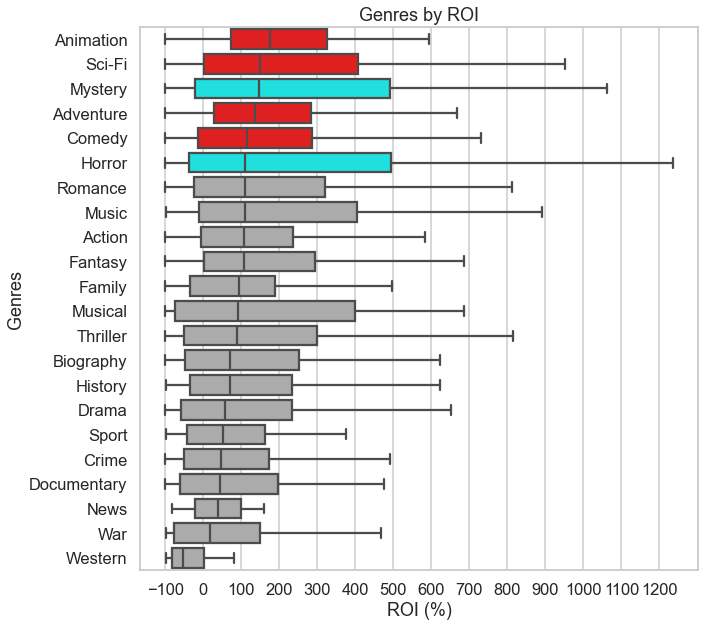

In [107]:
# roi by genre without outliers
ROIgenre = sns.boxplot(x='roi', y='genres', data=genredata, showfliers= False, order=sort('roi'), palette=colorset)
ROIgenre.set_title('Genres by ROI')
ROIgenre.set_ylabel('Genres')
ROIgenre.set_xlabel('ROI (%)')
plt.xticks([-100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]);

Above we can see the genres that have the highest median and the distribution of their ROI. We can focus on the top genres.

Create a boxplot showing profits by genres.

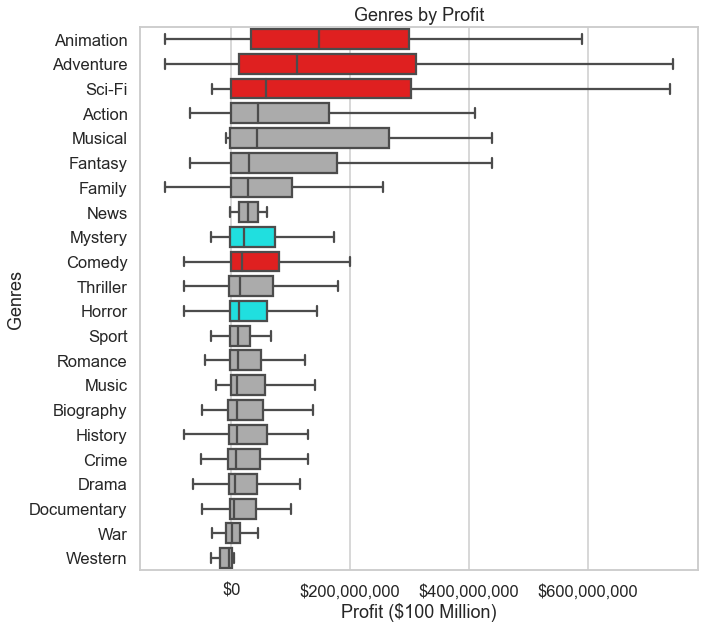

In [108]:
ProfitGenre = sns.boxplot(x='profit', y='genres', data=genredata, showfliers= False, order=sort('profit'), palette=colorset)
ProfitGenre.set_title('Genres by Profit')
ProfitGenre.set_ylabel('Genres')
ProfitGenre.set_xlabel('Profit ($100 Million)')
ProfitGenre.xaxis.set_major_formatter(tick);

Above we can see the genres with the highest raw profit.

Create a boxplotshowing production budget by genres.

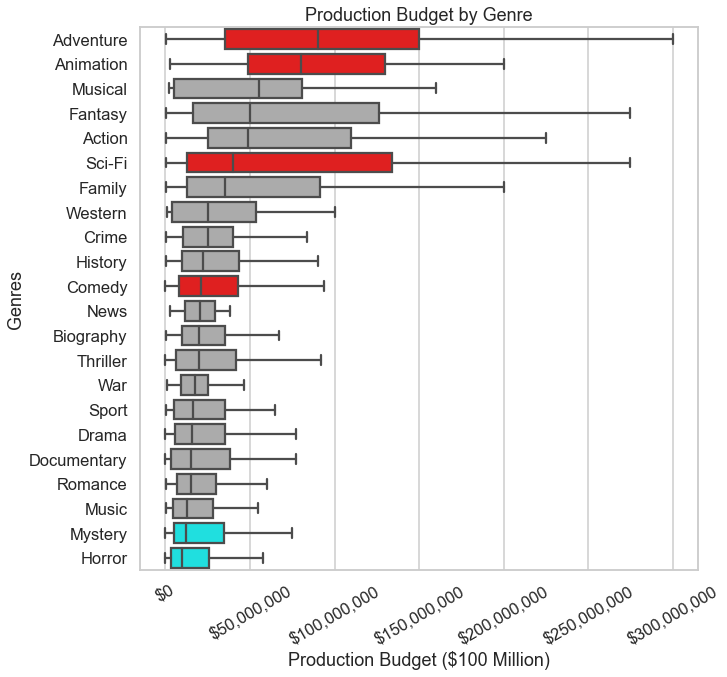

In [109]:
GenreBudget = sns.boxplot(x='production_budget', y='genres', data=genredata, 
                          showfliers= False, order=sort('production_budget'), palette=colorset)
GenreBudget.set_title('Production Budget by Genre')
GenreBudget.set_ylabel('Genres')
GenreBudget.set_xlabel('Production Budget ($100 Million)')
GenreBudget.xaxis.set_major_formatter(tick)
plt.xticks(rotation=30);

In [117]:
topGenres = genredata[(genredata.genres == 'Horror') |
                      (genredata.genres == 'Mystery') |
                      (genredata.genres == 'Adventure') |
                      (genredata.genres == 'Animation') |
                      (genredata.genres == 'Sci-Fi') |
                      (genredata.genres == 'Comedy') | 
                      (genredata.genres == 'Romance') |
                      (genredata.genres == 'Music')
                     ]
                      

In [118]:
topGenres

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average,month_num,month
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Adventure,James Cameron,7.4,12,Dec
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Sci-Fi,James Cameron,7.4,12,Dec
1,Pirates of the Caribbean: On Stranger Tides,tt1298650,2011-05-20,410600000.0,1.045664e+09,6.350639e+08,154.667286,Adventure,Rob Marshall,6.4,5,May
2,Avengers: Age of Ultron,tt2395427,2015-05-01,330600000.0,1.403014e+09,1.072414e+09,324.384139,Adventure,Joss Whedon,7.3,5,May
2,Avengers: Age of Ultron,tt2395427,2015-05-01,330600000.0,1.403014e+09,1.072414e+09,324.384139,Sci-Fi,Joss Whedon,7.3,5,May
...,...,...,...,...,...,...,...,...,...,...,...,...
3732,Raymond Did It,tt1716760,2011-03-27,40000.0,3.632000e+03,-3.636800e+04,-90.920000,Horror,Travis Legge,3.7,3,Mar
3742,Exeter,tt1945044,2015-03-26,25000.0,4.897920e+05,4.647920e+05,1859.168000,Horror,Marcus Nispel,4.7,3,Mar
3742,Exeter,tt1945044,2015-03-26,25000.0,4.897920e+05,4.647920e+05,1859.168000,Mystery,Marcus Nispel,4.7,3,Mar
3743,Exeter,tt2782686,2015-03-26,25000.0,4.897920e+05,4.647920e+05,1859.168000,Horror,Ann Tramonte,4.7,3,Mar


In [119]:
def sort2(value):
    return topGenres.loc[:,['genres', value]].groupby(['genres']).median().sort_values(by=value, ascending=False).index

In [120]:
plt.rcParams['figure.figsize'] = (10, 5)

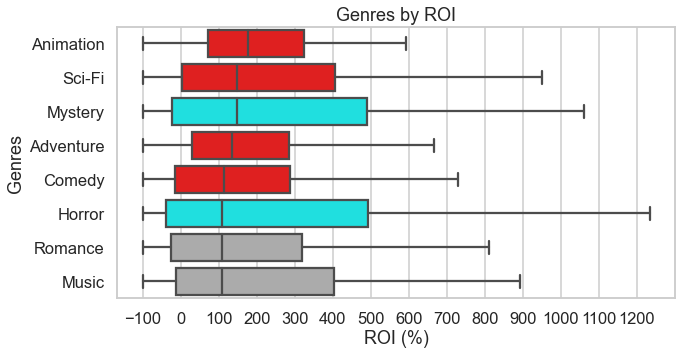

In [121]:
ROItopgenre = sns.boxplot(x='roi', y='genres', data=topGenres, showfliers= False, order=sort2('roi'), palette=colorset)
ROItopgenre.set_title('Genres by ROI')
ROItopgenre.set_ylabel('Genres')
ROItopgenre.set_xlabel('ROI (%)')

plt.xticks([-100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]);

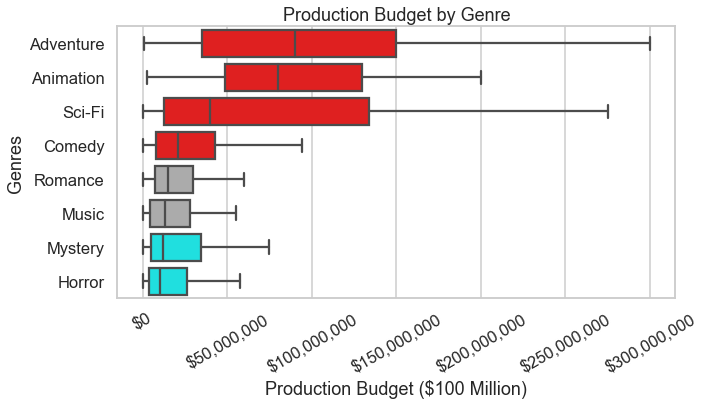

In [122]:
TopGenreBudget = sns.boxplot(x='production_budget', y='genres', data=topGenres, 
                          showfliers= False, order=sort2('production_budget'), palette=colorset)
TopGenreBudget.set_title('Production Budget by Genre')
TopGenreBudget.set_ylabel('Genres')
TopGenreBudget.set_xlabel('Production Budget ($100 Million)')
TopGenreBudget.xaxis.set_major_formatter(tick)
plt.xticks(rotation=30);

Here we can see the cost of production by genre. The most profitable and ROI genres are also usually the highest cost of production, with the exception of Mystery and Horror films, which have the lowest cost of production. 

From the above graphs we can find the highest ROI and profit films. Most of these (Adventure, Animation, Sci-Fi and Comedy) have fairly high cost of production, which breaking into a new industry should be easier by starting with a lower initial investment to get started and work our way up to large budget films. This is my Mystery and Horror are excellent genres to produce our first films. They have the lowest cost of production, but very high ROI as well as strong profit for the industry. 

## Graphs for Best Release Month

Create a graph showing the number of releases by month.

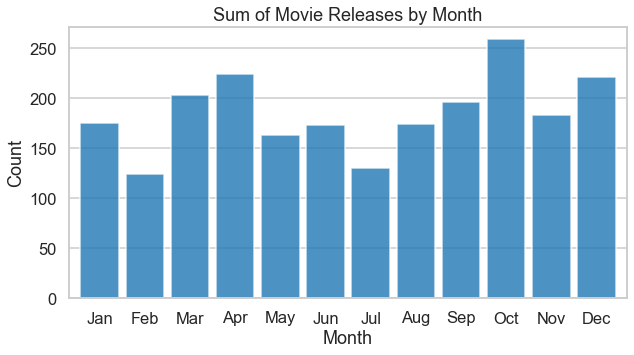

In [123]:
ax = moviedata.month.value_counts().loc[monthorder].plot.bar(alpha = 0.8, color='tab:blue', width = 0.85)
plt.xticks(rotation=0)
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Sum of Movie Releases by Month')
ax.xaxis.grid();

There are some months with a higher number of releases, which leads to more competition. A month with a lower amount of releases would be better for a release date. 

Create a graph of mean profit by month of release.

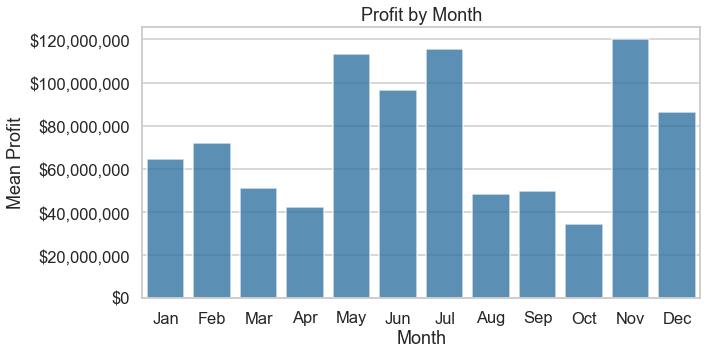

In [124]:
monthlyProfit = sns.barplot(x='month', y='profit', data=moviedata, ci=None, color='tab:blue', alpha=0.8, order = monthorder)
monthlyProfit.set_title('Profit by Month')
monthlyProfit.set_ylabel('Mean Profit')
monthlyProfit.set_xlabel('Month')

monthlyProfit.yaxis.set_major_formatter(tick);

Notice how a few months have far higher mean profits than the others. Combines with the number of releases we can start to narrow down the potential release months further. 

Create a graph of mean ROI by release month.

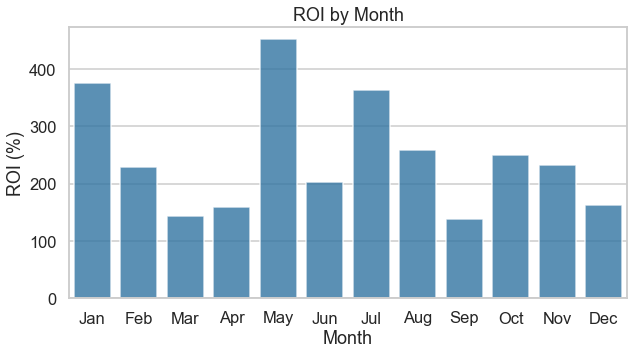

In [125]:
monthlyROI = sns.barplot(x='month', y='roi', data=moviedata, ci=None, color='tab:blue', alpha=0.8, order=monthorder)
monthlyROI.set_title('ROI by Month')
monthlyROI.set_ylabel('ROI (%)')
monthlyROI.set_xlabel('Month');

Again, there are a few months with much higher ROI. 

Create a graph of mean vote by month of release.

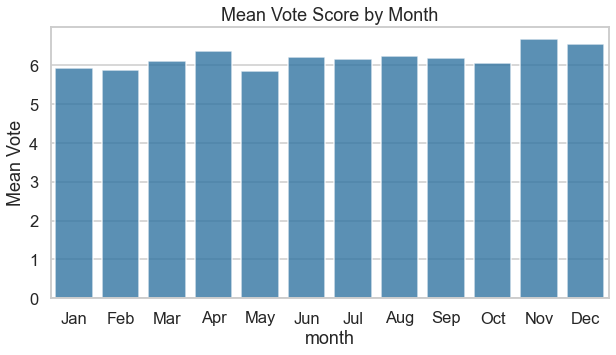

In [126]:
meanvote = sns.barplot(x='month', y='vote_average', data=moviedata, order=monthorder, ci=None, color='tab:blue', alpha=0.8)
meanvote.set_title('Mean Vote Score by Month')
meanvote.set_ylabel('Mean Vote');

There is little diffrence between the mean vote my month of release.

From the ROI by Month graph, we can see May has the highest ROI. May also has a lower number of releases by month than most other months making it an ideal month to launch in. 

## Best Director

Above in the graphs of finding the best genre we picked out a couple of high ROI film genres. Lets isolate those genres to find the best directors for those genres. 

In [50]:
#Create a function to select and isolate a genre
def isolate_genre (genrepick):
    df = genredata[genredata['genres'].map(lambda genre: genre == genrepick)]
    return(df)

In [51]:
horror = isolate_genre('Horror')
horror

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average,month_num,month
57,World War Z,tt0816711,2013-06-21,190000000.0,531514650.0,341514650.0,179.744553,Horror,Marc Forster,6.7,6,Jun
77,The Meg,tt4779682,2018-08-10,178000000.0,529530715.0,351530715.0,197.489166,Horror,Jon Turteltaub,5.9,8,Aug
92,Coco,tt7002100,2017-11-22,175000000.0,798008101.0,623008101.0,356.004629,Horror,Neil Boultby,8.2,11,Nov
142,Dark Shadows,tt1077368,2012-05-11,150000000.0,238202668.0,88202668.0,58.801779,Horror,Tim Burton,5.9,5,May
144,The Wolfman,tt0780653,2010-02-12,150000000.0,142634358.0,-7365642.0,-4.910428,Horror,Joe Johnston,5.7,2,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...
3689,Speak No Evil,tt2503358,2013-05-24,150000.0,32927.0,-117073.0,-78.048667,Horror,Roze,3.6,5,May
3716,Absentia,tt1610996,2011-03-03,70000.0,8555.0,-61445.0,-87.778571,Horror,Mike Flanagan,5.9,3,Mar
3732,Raymond Did It,tt1716760,2011-03-27,40000.0,3632.0,-36368.0,-90.920000,Horror,Travis Legge,3.7,3,Mar
3742,Exeter,tt1945044,2015-03-26,25000.0,489792.0,464792.0,1859.168000,Horror,Marcus Nispel,4.7,3,Mar


In [52]:
mystery = isolate_genre('Mystery')
mystery

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average,month_num,month
65,Blade Runner 2049,tt1856101,2017-10-06,185000000.0,259357408.0,74357408.0,40.193194,Mystery,Denis Villeneuve,7.4,10,Oct
307,Salt,tt0944835,2010-07-23,130000000.0,290650494.0,160650494.0,123.577303,Mystery,Phillip Noyce,6.3,7,Jul
328,Prometheus,tt1446714,2012-06-08,125000000.0,402448265.0,277448265.0,221.958612,Mystery,Ridley Scott,6.4,6,Jun
331,Total Recall,tt1386703,2012-08-03,125000000.0,211856088.0,86856088.0,69.484870,Mystery,Len Wiseman,5.9,8,Aug
442,The Girl with the Dragon Tattoo,tt1568346,2011-12-14,90000000.0,239373970.0,149373970.0,165.971078,Mystery,David Fincher,7.3,12,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...
3442,The Journey,tt3025936,2017-06-16,500000.0,19800.0,-480200.0,-96.040000,Mystery,Lance Nielsen,6.7,6,Jun
3668,The Overnight,tt3844362,2015-06-19,200000.0,1165996.0,965996.0,482.998000,Mystery,Patrick Brice,6.0,6,Jun
3691,Sound of My Voice,tt1748207,2011-01-22,135000.0,429448.0,294448.0,218.109630,Mystery,Zal Batmanglij,6.4,1,Jan
3716,Absentia,tt1610996,2011-03-03,70000.0,8555.0,-61445.0,-87.778571,Mystery,Mike Flanagan,5.9,3,Mar


Next we will take some key data from the isolated genres, group by director and get means for their films budget, roi and profit, as well as a count of number of films.

In [53]:
q4 = """
SELECT director_name, AVG(production_budget) AS budget, AVG(profit) AS profit, AVG(roi) AS roi, COUNT(roi) AS count
FROM horror 
GROUP BY director_name
ORDER BY roi DESC
LIMIT 10
"""

horror_director = pysqldf(q4)

In [54]:
horror_director

,director_name,budget,profit,roi,count
0,Levan Gabriadze,1000000.0,63364198.0,6336.419800,1
1,Tod Williams,3000000.0,174512032.0,5817.067733,1
2,William Brent Bell,5500000.0,79490221.0,5329.079260,2
3,Jordan Peele,5000000.0,250367951.0,5007.359020,1
4,Jill Wong,1500000.0,63745512.0,4249.700800,1
5,Bradley Parker,1000000.0,41411721.0,4141.172100,1
6,James Wan,10750000.0,198185513.5,4024.029886,2
7,M. Night Shyamalan,5000000.0,183821311.0,3676.426220,2
8,Franck Khalfoun,350000.0,9650000.0,2757.142857,1
9,Albin Joseph,350000.0,9650000.0,2757.142857,1


Make a series of bar charts with the information for the isolated genres.

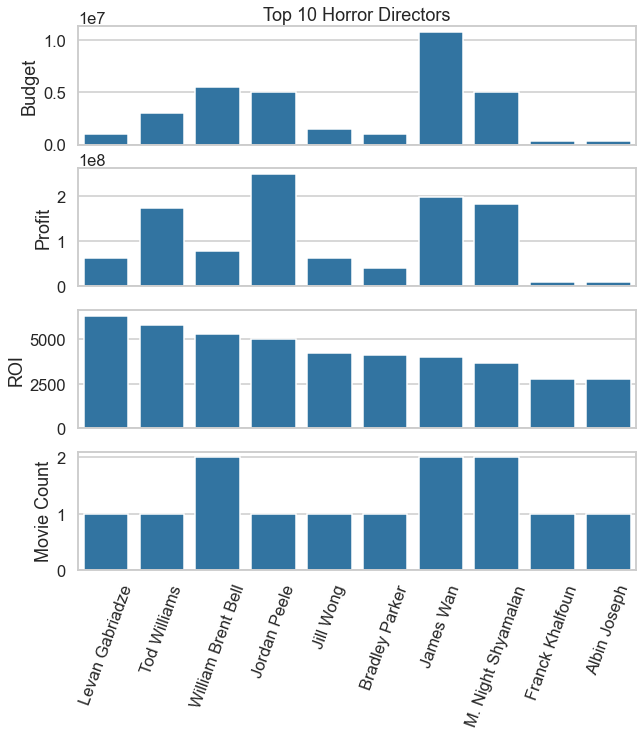

In [127]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

x = horror_director['director_name']
plt.xticks(rotation=70)

y1 = horror_director['budget']
sns.barplot(x=x, y=y1, ax=ax1, color ='tab:blue')
ax1.set_ylabel('Budget')
ax1.set_title('Top 10 Horror Directors')
ax1.set_xlabel('')

y2 = horror_director['profit']
sns.barplot(x=x, y=y2, ax=ax2, color ='tab:blue')
ax2.set_ylabel('Profit')
ax2.set_xlabel('')


y3 = horror_director['roi']
sns.barplot(x=x, y=y3, ax=ax3, color ='tab:blue')
ax3.set_ylabel('ROI')
ax3.set_xlabel('')

y4 = horror_director['count']
sns.barplot(x=x, y=y4, ax=ax4, color ='tab:blue')
ax4.set_ylabel('Movie Count')
ax4.set_xlabel('');


Here we can see the top ROI directors by the selected genre. We can focus on the directors with multiple films, Strong ROI, profit, and lower budgets.  

M. Night Shyamalan has directed multiple Horror films, he has a fairly low mean budget, high profit, and great ROI making him an ideal director for a Horror film. 

In [128]:
q5 = """
SELECT director_name, AVG(production_budget) AS budget, AVG(profit) AS profit, AVG(roi) AS roi, COUNT(roi) AS count
FROM mystery 
GROUP BY director_name
ORDER BY roi DESC
LIMIT 10
"""

mystery_director = pysqldf(q5)

In [129]:
mystery_director

,director_name,budget,profit,roi,count
0,Levan Gabriadze,1000000.0,63364198.0,6336.419800,1
1,Jordan Peele,5000000.0,250367951.0,5007.359020,1
2,Bradley Parker,1000000.0,41411721.0,4141.172100,1
3,James Wan,10750000.0,198185513.5,4024.029886,2
4,John R. Leonetti,6500000.0,250362920.0,3851.737231,1
5,Fabrice Gobert,5000000.0,143806510.0,2876.130200,1
6,David F. Sandberg,10000000.0,217095687.5,2406.014650,2
7,Dan Trachtenberg,5000000.0,103286422.0,2065.728440,1
8,Christopher Landon,5000000.0,102957557.0,2059.151140,2
9,Stiles White,5000000.0,98300632.0,1966.012640,1


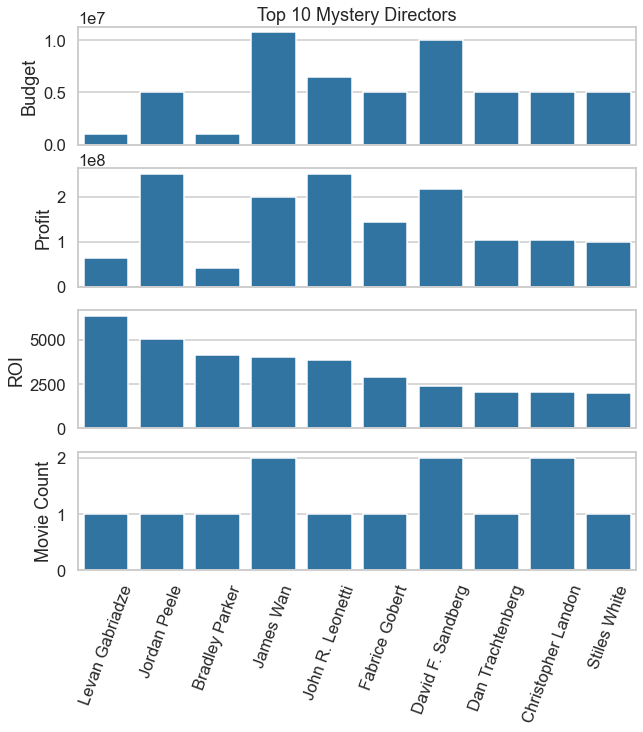

In [130]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

x = mystery_director['director_name']
plt.xticks(rotation=70)

y1 = mystery_director['budget']
sns.barplot(x=x, y=y1, ax=ax1, color ='tab:blue')
ax1.set_ylabel('Budget')
ax1.set_xlabel('')
ax1.set_title('Top 10 Mystery Directors')

y2 = mystery_director['profit']
sns.barplot(x=x, y=y2, ax=ax2, color ='tab:blue')
ax2.set_ylabel('Profit')
ax2.set_xlabel('')


y3 = mystery_director['roi']
sns.barplot(x=x, y=y3, ax=ax3, color ='tab:blue')
ax3.set_ylabel('ROI')
ax3.set_xlabel('')


y4 = mystery_director['count']
sns.barplot(x=x, y=y4, ax=ax4, color ='tab:blue')
ax4.set_ylabel('Movie Count')
ax4.set_xlabel('');

James Wan and David F. Sandberg both have directed multiple Mystery films, high ROI and profit. Although they have higher budgets than other directors here, overall they still have lower budgets than most other genres and have overall performed exceptionally. 

## Evaluation

In the above data we found Mystery and Horror are great starting genres for new movies. They both have great ROI, and the lowest production budgets. May would be an ideal release month, as it has top ROI and a lower amount of competition. It also will be out for summertime! We also found that James Wan, David F. Sandberg, and M. Night Shyamalan would all make great directors for our starting films with their experience and success in these genres. 



The highest ROI and profits are from the highest production budget genres. What stuck out is that 

## Conclusions
These results should help us get a good starting position for a new streaming and movie division, creating a solid foundation and giving owners and investors confidence in our high rate of return for the first couple of films. This should lead us to more higher budget films in the future but this would be the best starting course of action and good short term goals. In the event that a movie does not perform well, the lower cost will be easier to bare. I am confident that this will lead to a string start in the launch of a new division. 

If we procced in this direction it would be good to look at writers, and other key personal for the films. We could also capitalize on other division of Microsoft (such as gaming) to find film ideas, or even look outside the organization, such as at novels and original screenplays. 

Potential issues include potential missing or incorrect data, as well as outdated data. There is also far more factors that affect the success of a movie and streaming services. It would be good to dive deeper and get more in-depth information about the films and consider other factors. 
